<a href="https://colab.research.google.com/github/ncrowder/python/blob/main/PA5_1_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
import pandas as pd
import numpy as np

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [245]:
df = pd.read_csv(r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/data/mall_customers.csv')

In [246]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [248]:
df = df.drop(columns = 'CustomerID')
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [249]:
df.rename(columns = {'Genre':'Gender',"Annual Income (k$)":"Income","Spending Score (1-100)":"Spend_Score"}, inplace = True)

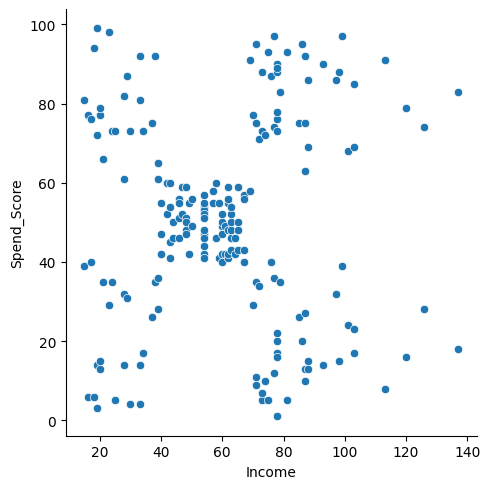

In [250]:
sns.relplot(data = df,x = 'Income',y="Spend_Score") # Can you change to include Age instead?  Can you include all 3?  What about including Gender as well?

### Start k-means with k = 2

In [251]:
x_2d = ['Income','Spend_Score']

In [252]:
scaler = StandardScaler()
x_2d_s = scaler.fit_transform(df[x_2d])

In [253]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels = kmeans.fit_predict(x_2d_s)

In [254]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [255]:
df2 = df.copy()

In [256]:
df2['label'] = labels

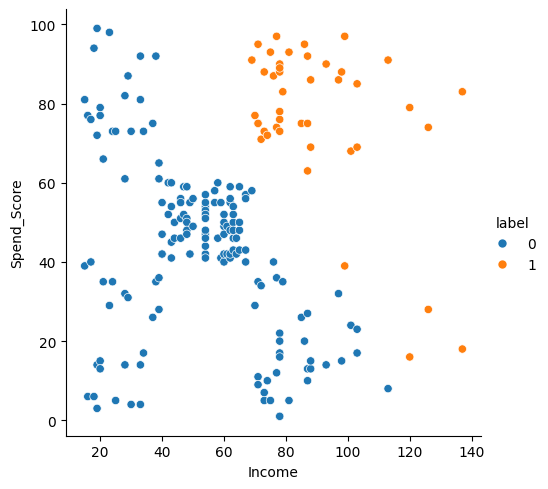

In [257]:
sns.relplot(kind='scatter', data = df2, x = 'Income', y='Spend_Score', hue = 'label')

In [258]:
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

In [259]:
centers

array([[52.57961783, 42.9044586 ],
       [89.69767442, 76.8372093 ]])

In [260]:
centers_df = pd.DataFrame(centers,columns=['Income','Spend_Score'])
centers_df['label'] = 'Center'

In [261]:
centers_df

,Income,Spend_Score,label
0,52.579618,42.904459,Center
1,89.697674,76.837209,Center


In [262]:
df2 = pd.concat([df2,centers_df],ignore_index=True)

In [263]:
df2.tail()

,Gender,Age,Income,Spend_Score,label
197,Male,32.0,126.000000,74.000000,1
198,Male,32.0,137.000000,18.000000,1
199,Male,30.0,137.000000,83.000000,1
200,NaN,NaN,52.579618,42.904459,Center
201,NaN,NaN,89.697674,76.837209,Center


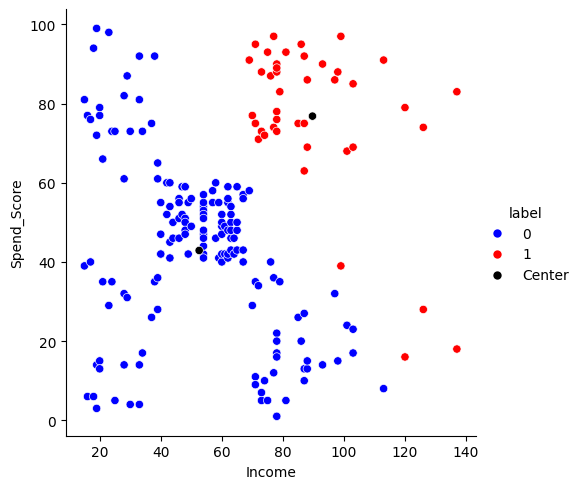

In [264]:
sns.relplot(
    data=df2,
    x='Income',
    y='Spend_Score',
    hue='label',
    #style = 'label',
    #markers = {0:'o',1:'o','Center':'s'}
    palette= {0:'blue', 1:'red', 'Center':'black'} # color centers black
)

### Try with k = 3

In [265]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(x_2d_s)

In [266]:
df3 = df.copy()

In [267]:
df3['label'] = labels

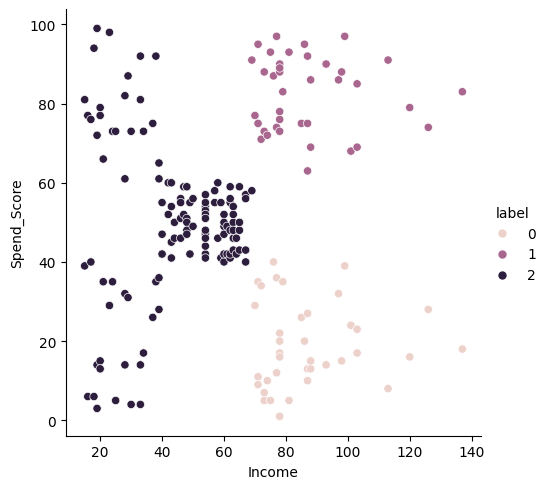

In [268]:
sns.relplot(kind='scatter', data = df3, x = 'Income', y='Spend_Score', hue = 'label')

In [269]:
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [44.15447154, 49.82926829]])

In [270]:
centers_df = pd.DataFrame(centers,columns = ['Income','Spend_Score'])
centers_df['label'] = 'Center'
centers_df

,Income,Spend_Score,label
0,87.000000,18.631579,Center
1,86.538462,82.128205,Center
2,44.154472,49.829268,Center


In [271]:
df3 = pd.concat([df3,centers_df],ignore_index=True)
df3.tail()

,Gender,Age,Income,Spend_Score,label
198,Male,32.0,137.000000,18.000000,0
199,Male,30.0,137.000000,83.000000,1
200,NaN,NaN,87.000000,18.631579,Center
201,NaN,NaN,86.538462,82.128205,Center
202,NaN,NaN,44.154472,49.829268,Center


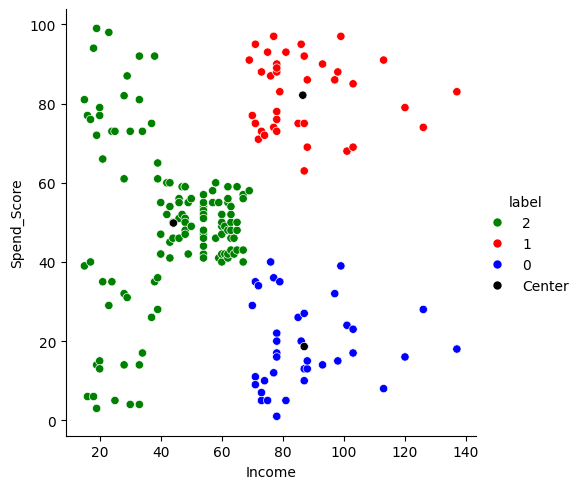

In [272]:
sns.relplot(
    data=df3,
    x='Income',
    y='Spend_Score',
    hue='label',
    palette= {0:'blue', 1:'red', 2:'green','Center':'black'} # color centers black
)

### Create a loop to plot results for a variety of k values

In [273]:
df_wide = df.copy()

In [274]:
k_values = [2,3,4,5]
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    df_wide[f'{k}'] = km.fit_predict(x_2d_s)

In [205]:
df_wide

,Gender,Age,Income,Spend_Score,2,3,4,5
0,Male,19,15,39,0,2,0,4
1,Male,21,15,81,0,2,2,2
2,Female,20,16,6,0,2,0,4
3,Female,23,16,77,0,2,2,2
4,Female,31,17,40,0,2,0,4
...,...,...,...,...,...,...,...,...
195,Female,35,120,79,1,1,1,1
196,Female,45,126,28,1,0,3,3
197,Male,32,126,74,1,1,1,1
198,Male,32,137,18,1,0,3,3


In [206]:
df_long = df_wide.melt(
    id_vars=['Income','Spend_Score'],
    value_vars=[str(k) for k in k_values],  # columns: '2','3','4','5'
    var_name='k',
    value_name='label'
)

In [207]:
df_long

,Income,Spend_Score,k,label
0,15,39,2,0
1,15,81,2,0
2,16,6,2,0
3,16,77,2,0
4,17,40,2,0
...,...,...,...,...
795,120,79,5,1
796,126,28,5,3
797,126,74,5,1
798,137,18,5,3


In [208]:
df_long['k'] = df_long['k'].astype(int)

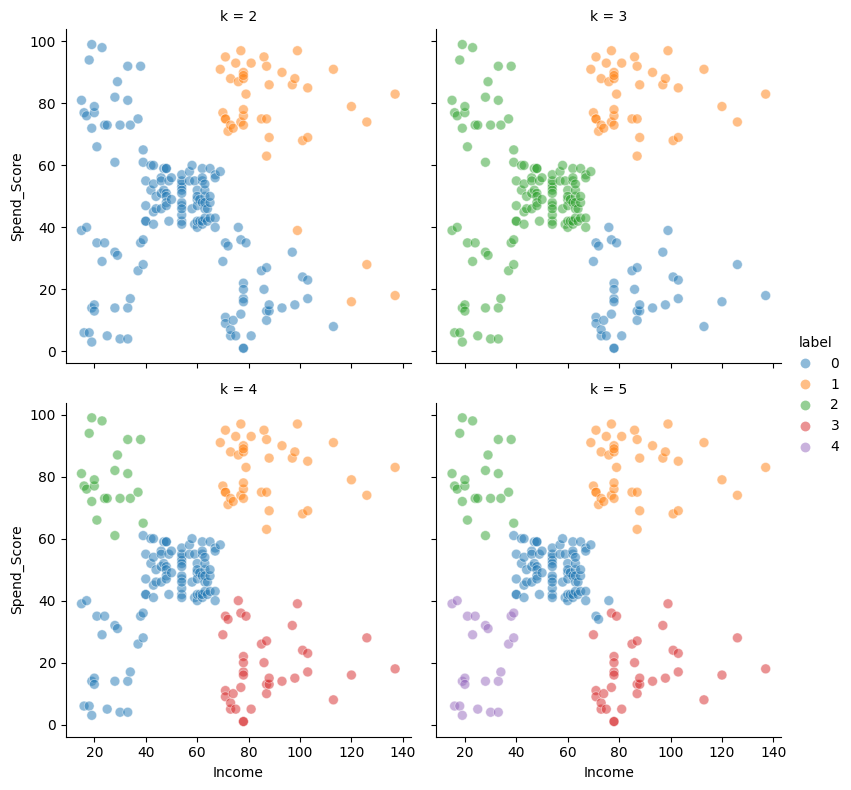

In [211]:
g = sns.relplot(
    data=df_long,
    x='Income',
    y='Spend_Score',
    hue='label',
    col='k',
    col_wrap=2,
    height=4,
    palette='tab10',      # tab10 is good for up to 10 clusters
    alpha=0.5,
    s=50
)
g.set_titles("k = {col_name}")
plt.show()

### Use established metrics to pick the best value of k

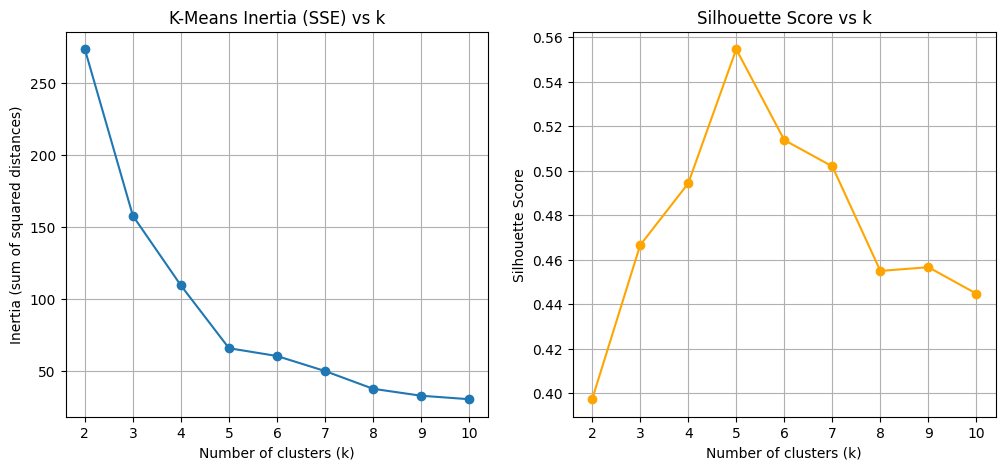

In [275]:
k_values = range(2, 11)

inertia_list = []
silhouette_list = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(x_2d_s)  # your scaled features
    inertia_list.append(km.inertia_)
    silhouette_list.append(silhouette_score(x_2d_s, labels))

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Plot Inertia
axes[0].plot(k_values, inertia_list, marker='o')
axes[0].set_title('K-Means Inertia (SSE) vs k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia (sum of squared distances)')
axes[0].set_xticks(k_values)
axes[0].grid(True)

# Plot Silhouette
axes[1].plot(k_values, silhouette_list, marker='o', color='orange')
axes[1].set_title('Silhouette Score vs k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_values)
axes[1].grid(True)

### Testing metrics for the 3 feature case

In [214]:
x_3d = ['Age','Income','Spend_Score']

In [216]:
x_3d_s = scaler.fit_transform(df[x_3d])

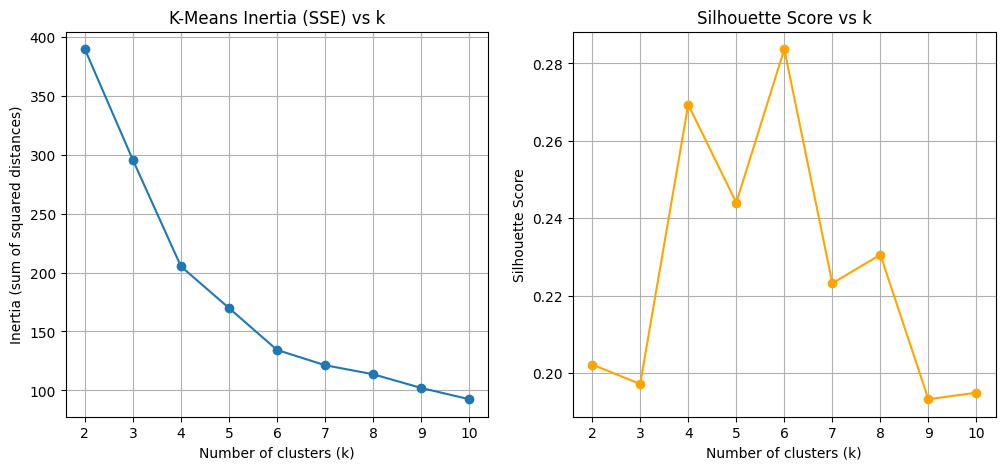

In [217]:
# k values to try
k_values = range(2, 11)

inertia_list = []
silhouette_list = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(x_3d_s)  # your scaled features
    inertia_list.append(km.inertia_)
    silhouette_list.append(silhouette_score(x_2d_s, labels))

# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

# Plot Inertia
axes[0].plot(k_values, inertia_list, marker='o')
axes[0].set_title('K-Means Inertia (SSE) vs k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia (sum of squared distances)')
axes[0].set_xticks(k_values)
axes[0].grid(True)

# Plot Silhouette
axes[1].plot(k_values, silhouette_list, marker='o', color='orange')
axes[1].set_title('Silhouette Score vs k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(k_values)
axes[1].grid(True)

### Assignment of labels for the 3 feature case (k = 6)

In [221]:
km = KMeans(n_clusters=6, random_state=42, n_init='auto')
labels = km.fit_predict(x_3d_s)          # cluster labels

In [225]:
labels

array([2, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 0, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [226]:
df_3d = df.copy()

In [228]:
df_3d['label'] = labels

In [229]:
df_3d

,Gender,Age,Income,Spend_Score,label
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,4
197,Male,32,126,74,1
198,Male,32,137,18,4


### Identifying centers (or typical) member of each group

In [ ]:
centers_scaled = km.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

In [237]:
center_df = pd.DataFrame(centers,columns=['Age','Income','Spend_Score']).rename_axis('cluster')

In [238]:
center_df

,Age,Income,Spend_Score
cluster,,,
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.560000,26.480000,76.240000
3,26.125000,59.425000,44.450000
4,44.000000,90.133333,17.933333
5,45.523810,26.285714,19.380952


### Analysis of groups

In [241]:
df_3d.label.value_counts().sort_index()

,count
label,
0,45
1,39
2,25
3,40
4,30
5,21


In [243]:
df_3d.groupby('label')[['Age','Income','Spend_Score']].agg(['mean','median','max','min'])

Age                    Income                 Spend_Score         \
            mean median max min       mean median  max min        mean median   
label                                                                           
0      56.333333   54.0  70  43  54.266667   54.0   79  38   49.066667   49.0   
1      32.692308   32.0  40  27  86.538462   79.0  137  69   82.128205   83.0   
2      25.560000   24.0  35  18  26.480000   25.0   42  15   76.240000   76.0   
3      26.125000   25.0  40  18  59.425000   60.0   81  40   44.450000   48.0   
4      44.000000   43.5  59  32  90.133333   87.0  137  71   17.933333   16.5   
5      45.523810   46.0  67  20  26.285714   25.0   39  16   19.380952   15.0   

               
      max min  
label          
0      60  35  
1      97  63  
2      99  39  
3      60   5  
4      39   1  
5      40   3